Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Load the Dataset

In [4]:
# Load dataset
df = pd.read_csv("../dataset/penguins.csv")  # Adjust path if needed

# Display first few rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Clean the Dataset

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


Select Features for K-Means

In [6]:
selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

Select 100 Random Data Points

In [7]:
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

# Display the sample dataset
df_sample.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,40.5,18.9,180.0
1,39.6,20.7,191.0
2,42.9,17.6,196.0
3,49.8,17.3,198.0
4,37.6,17.0,185.0


Standardize features

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample)

K-Means Algorithm

In [9]:
def initialize_centroids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids


Elbow Method

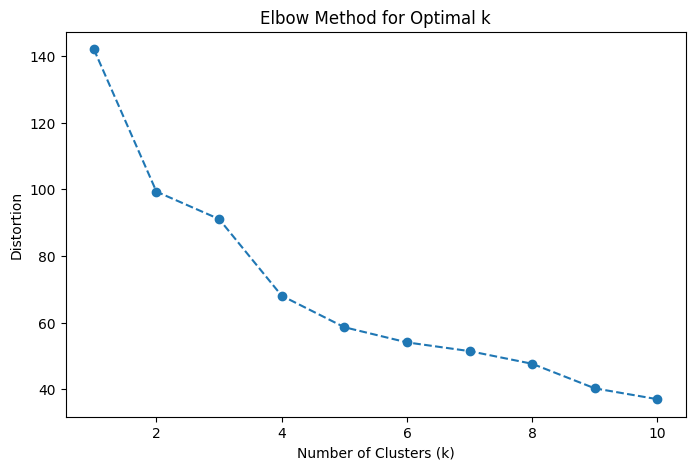

In [10]:
def elbow_method(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        _, centroids = kmeans(data, k)
        distortions.append(np.sum(np.min(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)))
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), distortions, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

elbow_method(df_scaled)


Apply K-means Clustering

In [11]:
k = 3
labels, centroids = kmeans(df_scaled, k)

Visualize Clusters

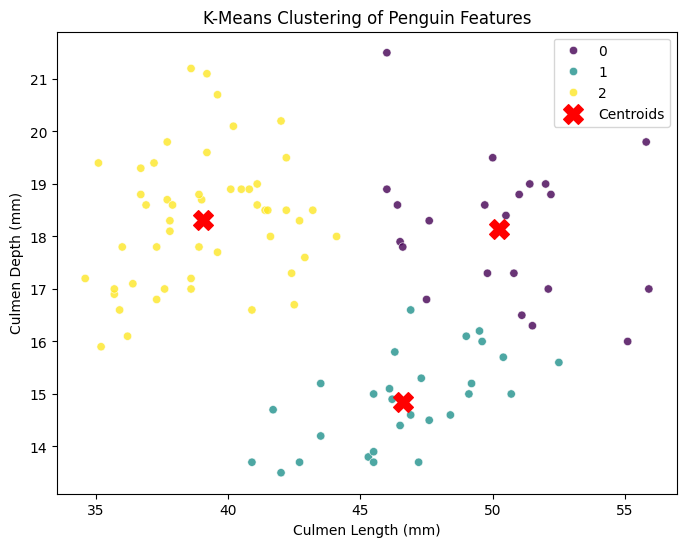

In [12]:
def visualize_clusters(df_sample, labels, centroids, scaler):
    df_sample['cluster'] = labels
    centroids_original = scaler.inverse_transform(centroids)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_sample['culmen_length_mm'], 
                    y=df_sample['culmen_depth_mm'], 
                    hue=df_sample['cluster'], 
                    palette='viridis', 
                    alpha=0.8)
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
                c='red', marker='X', s=200, label='Centroids')
    plt.xlabel("Culmen Length (mm)")
    plt.ylabel("Culmen Depth (mm)")
    plt.title("K-Means Clustering of Penguin Features")
    plt.legend()
    plt.show()

visualize_clusters(df_sample, labels, centroids, scaler)


Cluster Centers

In [14]:
print("Cluster Centers:")
print(scaler.inverse_transform(centroids))

Cluster Centers:
[[ 50.25        18.14090909 205.59090909]
 [ 46.625       14.84642857 216.35714286]
 [ 39.06        18.312      286.12      ]]
